<a href="https://colab.research.google.com/github/CARC2806/TI3002C.101/blob/main/A00833458_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Base**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import het_breuschpagan

In [19]:
db = pd.read_excel('/content/drive/MyDrive/Lab2/Updated_Dataset.xlsx')

In [20]:
likert_maping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5,
    'Ni deacuerdo ni en desacuerdo': 3,
    'Neither Agree nor Disagree': 3
}

db.replace(likert_maping, inplace=True)

<ipython-input-20-0d6fff4c2ac1>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db.replace(likert_maping, inplace=True)


In [21]:
df = pd.DataFrame()
df['ID'] = db['ID']
df['Gender'] = db['Gender']
df['Residence_Country'] = db['Country of Residence']
df['Discipline'] = db['Discipline']
df['Education_level'] = db['Education Level']
df['Occupation'] = db['Occupation']
df['Systematic_thinking'] = db.iloc[:, 9:15].mean(axis=1).round(1)
df['Scientific_thinking'] = db.iloc[:, 15:22].mean(axis=1).round(1)
df['Critical_thinking'] = db.iloc[:, 22:28].mean(axis=1).round(1)
df['Innovative_thinking'] = db.iloc[:, 28:].mean(axis=1).round(1)
df['Complex_thinking'] = df.iloc[:, 6:10].mean(axis=1).round(1)


#**1. Divide the data set into two parts: training (85%) and testing (15%)**

In [22]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Residence_Country', 'Discipline', 'Education_level', 'Occupation'], drop_first=True)

imputer = SimpleImputer(strategy='mean')
df_encoded_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)
X = df_encoded_imputed.drop(columns=['ID', 'Complex_thinking'])
y = df_encoded_imputed['Complex_thinking']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#**2. Conduct a multiple linear regression on the following variables: Gender, Country of Residence, Discpline, Education Level, Occupation, Systematic Thinking, Scientific Thinking, Critical Thinking, and Innovative Thinking to Predict Complex Thinking. Interprete the ANOVA Table and list down the significant variables. Use only training data set here**

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

x_train_const = sm.add_constant(x_train)
x_train_const = x_train_const.apply(pd.to_numeric)

ols_model = sm.OLS(y_train, x_train_const).fit()
print(ols_model.summary())

Mean Squared Error (MSE): 0.0009302842881191319
                            OLS Regression Results                            
Dep. Variable:       Complex_thinking   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.408e+04
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        05:02:20   Log-Likelihood:                 2089.6
No. Observations:                 984   AIC:                            -4121.
Df Residuals:                     955   BIC:                            -3979.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#**3. Develop an equation of regression method using only the list of significant variables. Put the data from the testing data set and record the residual between them**

In [24]:
p_values = ols_model.pvalues
significance_level = 0.05
significant_features = p_values[p_values < significance_level].index.tolist()

x_train_significant = x_train[significant_features]
x_test_significant = x_test[significant_features]

model_significant = LinearRegression()
model_significant.fit(x_train_significant, y_train)

y_pred_significant = model_significant.predict(x_test_significant)

residuals = y_test - y_pred_significant

mse_significant = mean_squared_error(y_test, y_pred_significant)
print("Mean Squared Error (MSE) with significant variables:", mse_significant)

print("Residuals:", residuals)

Mean Squared Error (MSE) with significant variables: 0.0009076192647509112
Residuals: 941    0.023447
265    0.053271
109   -0.048030
299   -0.027404
752   -0.025840
         ...   
138   -0.046095
649   -0.048980
622    0.048371
848   -0.001009
708    0.024156
Name: Complex_thinking, Length: 174, dtype: float64


#**4. In the form of comments at the end of the code, please explain the differences between forward elimination and backward elimination**

In [25]:
#Forward elimination starts with no variables and adds them one by one based on their significance to improving the model.
#Backward elimination, on the other hand, starts with all variables and removes them one at a time based on their impact.
#Both methods aim to identify the best combination of variables, but they approach the process from opposite directions.

#**5. Check the assumption of errors including: normality, independence of errors, and homoscedasticity of errors through graphical method and through statistical testing**

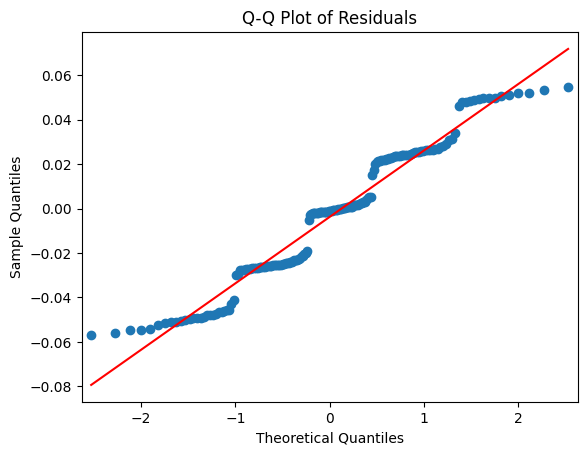

Shapiro-Wilk Test: W = 0.9516856006441274, p-value = 1.135518769977687e-05
Kolmogorov-Smirnov Test: D = 0.4781800913936106, p-value = 4.298282418096467e-37


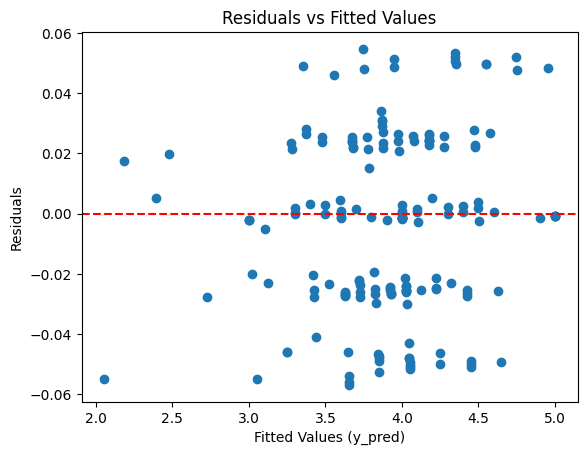

Durbin-Watson Test statistic: 1.8142542154082117
Breusch-Pagan Test: LM-statistic = 10.4547711747377, p-value = 0.03342574085494972


In [26]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test = shapiro(residuals)
ks_test = kstest(residuals, 'norm')

print(f"Shapiro-Wilk Test: W = {shapiro_test[0]}, p-value = {shapiro_test[1]}")
print(f"Kolmogorov-Smirnov Test: D = {ks_test[0]}, p-value = {ks_test[1]}")

plt.scatter(y_pred_significant, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (y_pred)")
plt.ylabel("Residuals")
plt.show()

dw_test = durbin_watson(residuals)
print(f"Durbin-Watson Test statistic: {dw_test}")

x_test_significant_const = sm.add_constant(x_test_significant)
bp_test = het_breuschpagan(residuals, x_test_significant_const)

print(f"Breusch-Pagan Test: LM-statistic = {bp_test[0]}, p-value = {bp_test[1]}")

#**6. Evaluate the following performance metrics for regression reporting for both training and testing dataset: MSE, SEE, MAPE, RMSE, MAE, MPE, COD**

In [27]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    cod = r2_score(y_true, y_pred)
    see = np.sqrt(np.sum((y_true - y_pred)**2) / (len(y_true) - 2))

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'MPE': mpe,
        'SEE': see,
        'COD (R²)': cod
    }

y_train_pred = model_significant.predict(x_train_significant)
train_metrics = calculate_metrics(y_train, y_train_pred)

y_test_pred = model_significant.predict(x_test_significant)
test_metrics = calculate_metrics(y_test, y_test_pred)

print("Training Performance Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value}")

print("\nTesting Performance Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value}")

Training Performance Metrics:
MSE: 0.0008622909193239807
RMSE: 0.029364790469607997
MAE: 0.023256831862052955
MAPE: 0.6193376254346245
MPE: -0.009403504859499683
SEE: 0.02939467830479455
COD (R²): 0.9975114788908211

Testing Performance Metrics:
MSE: 0.0009076192647509112
RMSE: 0.03012672011273234
MAE: 0.02469946707604784
MAPE: 0.645066053516674
MPE: -0.11840429215894818
SEE: 0.030301369228662518
COD (R²): 0.9964366193876696


#**7. Make a graph of the regression fit including a regression line, and a scatter plot**

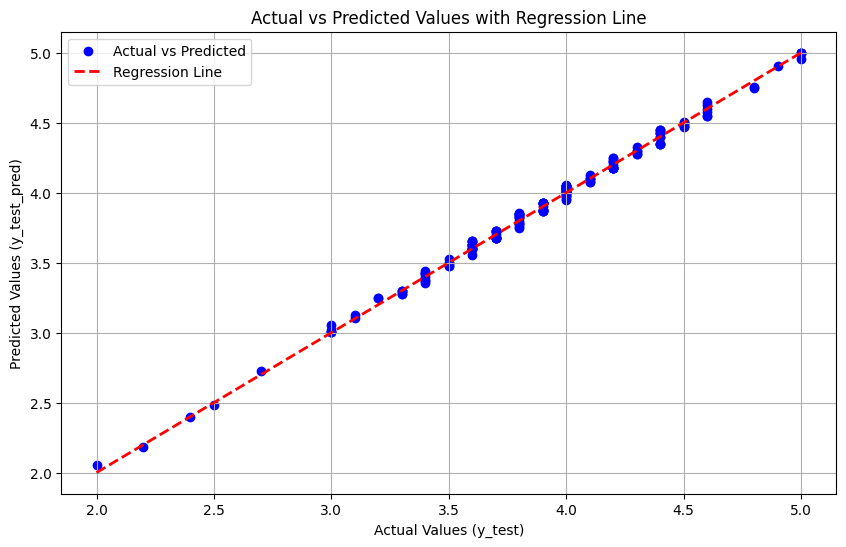

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.title('Actual vs Predicted Values with Regression Line')
plt.legend()
plt.grid(True)

plt.show()